__Project Rock Paper Scissors__

Nama Lengkap : Yusuf Muhammad Nur Zaman

Username     : ymnzaman

E-mail        : m2292225@bangkit.academy
         

In [58]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-31 15:28:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  1.50MB/s    in 3m 23s  

2021-05-31 15:31:34 (1.52 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [59]:
import zipfile

with zipfile.ZipFile('rockpaperscissors.zip', 'r') as z:
  z.extractall('./')

In [60]:
import os

data_dir = 'rockpaperscissors/rps-cv-images'
rock_dir = os.path.join('rockpaperscissors/rps-cv-images/rock')
paper_dir = os.path.join('rockpaperscissors/rps-cv-images/paper')
scissor_dir = os.path.join('rockpaperscissors/rps-cv-images/scissors')


print('total rock images:', len(os.listdir(rock_dir)))
print('total paper images:', len(os.listdir(paper_dir)))
print('total scissor images:', len(os.listdir(scissor_dir)))

print(int(len(os.listdir(rock_dir))) + int(len(os.listdir(scissor_dir))) + int(len(os.listdir(paper_dir))))

total rock images: 726
total paper images: 712
total scissor images: 750
2188


In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_size = 0.4

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = validation_size
)

In [62]:
train_generator = train_datagen.flow_from_directory(
      data_dir,
      target_size = (150, 150),
      class_mode = 'categorical',
      subset = 'training')

Found 1314 images belonging to 3 classes.


In [63]:
validation_generator = train_datagen.flow_from_directory(
        data_dir, 
        target_size=(150, 150), 
        class_mode='categorical', 
        subset = 'validation')

Found 874 images belonging to 3 classes.


In [64]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [65]:
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= 0.85:
            print('\nReached 85% accuracy')
            self.model.stop_training = True

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [66]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

Epoch 1/20
25/25 - 8s - loss: 1.1089 - accuracy: 0.3925 - val_loss: 1.0092 - val_accuracy: 0.7312
Epoch 2/20
25/25 - 6s - loss: 0.8643 - accuracy: 0.6325 - val_loss: 0.6180 - val_accuracy: 0.8188
Epoch 3/20
25/25 - 6s - loss: 0.5650 - accuracy: 0.7961 - val_loss: 0.5091 - val_accuracy: 0.8562
Epoch 4/20
25/25 - 6s - loss: 0.4094 - accuracy: 0.8519 - val_loss: 0.3210 - val_accuracy: 0.8938

Reached 85% accuracy


Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (4).png
00nKV8oHuTGi20gq.png
Rock!


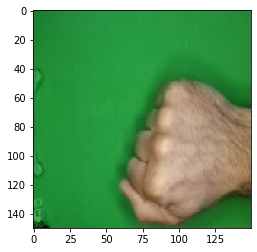

In [67]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for img_uploaded in uploaded.keys():
 
  path = img_uploaded
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(img_uploaded)

  if classes[0][0] == True:
    print('Paper!')
  elif classes[0][1] == True:
    print('Rock!')
  else:
    print('Scissor!')